# Brain Tumor Detection with VGG-16 Model


The main purpose of this project was to build a CNN model that would classify if subject has a tumor or not base on MRI scan.
We have used the VGG-16 model architecture and weights to train the model for this binary problem

https://www.kaggle.com/ruslankl/brain-tumor-detection

https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

## Data Set Description

The image data that was used for this problem is Brain MRI Images for Brain Tumor Detection. It conists of MRI scans of two classes:

* NO - no tumor, encoded as 0

* YES - tumor, encoded as 1

## Import Data

In [0]:
#from google.colab import files
#files.upload()

In [0]:
#!mkdir tumor_data
#!unzip Brain_Tumor_Dataset.zip  -d tumor_data

In [0]:
#!mkdir TRAIN TEST VAL TRAIN/yes TRAIN/no TEST/yes TEST/no VAL/yes VAL/no

In [0]:
#!rmdir TRAIN/YES TRAIN/NO TEST/YES TEST/NO VAL/YES VAL/NO

##Data Import and Preprocessing

In [0]:
TUMOR_SOURCE_DIR = "tumor_data/yes/"
TRAINING_TUMOR_DIR = 'TRAIN/yes/'
TESTING_TUMOR_DIR = 'TEST/yes/'
NO_TUMOR_SOURCE_DIR = "tumor_data/no/"
TRAINING_NO_TUMOR_DIR = 'TRAIN/no/'
TESTING_NO_TUMOR_DIR = 'TEST/no/'

In [0]:
import os
import random
from shutil import copyfile
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  images = []
  for img in os.listdir(SOURCE):
    path = os.path.join(SOURCE,img)
    if os.path.getsize(path) ==0:
      print(img +" is zero length, so ignoring")
    else:
      images.append(img)
   
  img_list = random.sample(images, len(images))
  train_size = int(len(images) * SPLIT_SIZE)
  test_size = int(len(images) - train_size )
  #print(train_size,test_size)
  for i in img_list[:train_size]:
    source = os.path.join(SOURCE,i)
    destination = os.path.join(TRAINING,i)
    copyfile(source,destination) 
    
  for i in img_list[-test_size:]:
    source = os.path.join(SOURCE,i)
    destination = os.path.join(TESTING,i)
    copyfile(source,destination) 

In [0]:
split_size = .8
split_data(TUMOR_SOURCE_DIR , TRAINING_TUMOR_DIR, TESTING_TUMOR_DIR, split_size)
split_data(NO_TUMOR_SOURCE_DIR, TRAINING_NO_TUMOR_DIR, TESTING_NO_TUMOR_DIR, split_size)

In [63]:
print(len(os.listdir(TRAINING_TUMOR_DIR)))
print(len(os.listdir(TRAINING_NO_TUMOR_DIR)))
print(len(os.listdir(TESTING_TUMOR_DIR)))
print(len(os.listdir(TESTING_NO_TUMOR_DIR)))

153
94
60
36


## Setting up the Environment

In [0]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

## Method 1 - converting the images into array and labelling them accordingly

In [0]:
dataset = []
label =[]

In [0]:
import cv2
from PIL import Image

##Appending tumor data

In [0]:
IMG_PATH = 'tumor_data/yes/'
for file in os.listdir(IMG_PATH):
  image = cv2.imread(IMG_PATH + file)
  #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image = Image.fromarray(image)
  image = image.resize((150, 150))
  dataset.append(np.array(image))
  label.append(1)
    
    

In [26]:
len(dataset),len(label)

(155, 155)

In [27]:
dataset[0].shape

(150, 150, 3)

## Appending non Tumor Data

In [0]:
IMG_PATH = 'tumor_data/no/'
for file in os.listdir(IMG_PATH):
  image = cv2.imread(IMG_PATH + file)
  #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image = Image.fromarray(image)
  image = image.resize((150, 150))
  dataset.append(np.array(image))
  label.append(0)

In [29]:
len(dataset),len(label)

(253, 253)

In [30]:
dataset[-1].shape

(150, 150, 3)

## Randomly Plotting 10  different  images

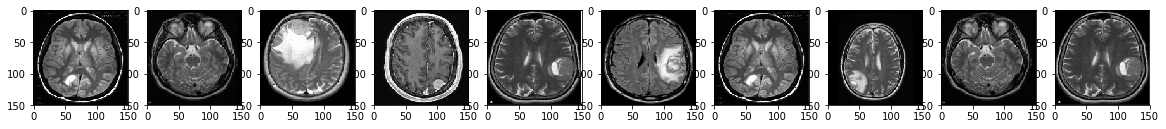

In [31]:
plt.figure(figsize=(20,11))
for i , image_index in enumerate(np.random.randint(len(os.listdir('tumor_data/yes/')),size=10)):
  plt.subplot(1,10,i  + 1)
  plt.imshow(dataset[image_index])

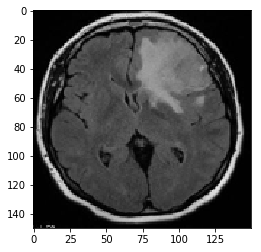

In [32]:
plt.imshow(dataset[0])

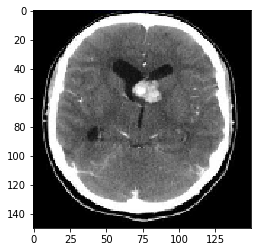

In [33]:
plt.imshow(dataset[-1])

In [34]:
X = np.array(dataset)
print(X.shape)


(253, 150, 150, 3)


In [35]:
Y= np.array(label)
Y.shape

(253,)

## Splitting the data in training and validation set

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=1)

In [37]:
print(X_train.shape)

(202, 150, 150, 3)


In [38]:
print(X_test.shape)

(51, 150, 150, 3)


##Build CNN model using Keras

In [41]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
    
])
model.summary()

W0721 13:22:43.567297 139724524828544 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

##Compile the model

In [42]:
from tensorflow.keras.optimizers import Adam, RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

W0721 13:23:09.997948 139724524828544 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#Train the model

In [43]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=20,verbose=1)

Train on 202 samples, validate on 51 samples
Epoch 1/20
202/202 [==============================] - 4s 17ms/sample - loss: 7.9332 - acc: 0.6089 - val_loss: 3.7886 - val_acc: 0.5490
Epoch 2/20
202/202 [==============================] - 0s 2ms/sample - loss: 0.8606 - acc: 0.6931 - val_loss: 1.1222 - val_acc: 0.7451
Epoch 3/20
202/202 [==============================] - 0s 2ms/sample - loss: 0.8382 - acc: 0.6386 - val_loss: 0.5733 - val_acc: 0.7451
Epoch 4/20
202/202 [==============================] - 0s 2ms/sample - loss: 0.6206 - acc: 0.6881 - val_loss: 0.9573 - val_acc: 0.6471
Epoch 5/20
202/202 [==============================] - 0s 2ms/sample - loss: 0.5170 - acc: 0.7723 - val_loss: 0.4968 - val_acc: 0.7451
Epoch 6/20
202/202 [==============================] - 0s 2ms/sample - loss: 0.4467 - acc: 0.8069 - val_loss: 0.5648 - val_acc: 0.7843
Epoch 7/20
202/202 [==============================] - 0s 2ms/sample - loss: 0.4654 - acc: 0.8267 - val_loss: 0.4537 - val_acc: 0.8039
Epoch 8/20
202/2

## Visualize Accuracy and Loss

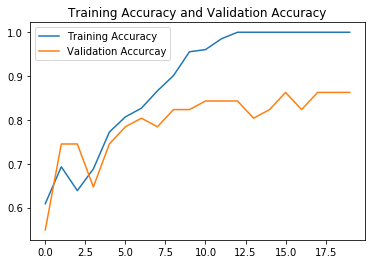

In [44]:
plt.plot(history.history['acc'],label='Training Accuracy')
plt.plot(history.history['val_acc'],label='Validation Accurcay')
plt.legend()
plt.title('Training Accuracy and Validation Accuracy')
plt.show()

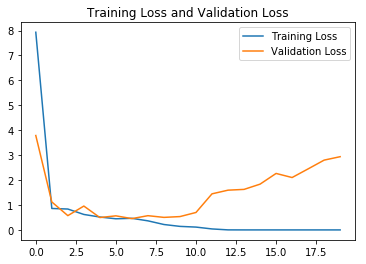

In [46]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Training Loss and Validation Loss')
plt.show()

## Predictions

In [0]:
predictions = model.predict(X_test,batch_size=10)

In [0]:
y_pred = []
for i in predictions:
  #print(np.round(i[0],2))
  if np.round(i[0],2) > 0.5 :
    #print(1)
    y_pred.append(1)
  else:
    #print(0)
    y_pred.append(0)
    

## Test Accuracy

In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8627450980392157


## Auto label the images base on the names of the folder using ImageDataGenerator

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Create instance of ImageDataGenerator for training data

In [64]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('TRAIN/',target_size=(150,150),batch_size=10,class_mode='binary')

Found 247 images belonging to 2 classes.


##Create instance of ImageDataGenerator for test data

In [65]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory('TEST/',target_size=(150,150),batch_size=10,class_mode='binary',shuffle=False)

Found 96 images belonging to 2 classes.


## Build CNN model

In [66]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
    
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 128)      

## Compile the Model

In [0]:
from tensorflow.keras.optimizers import Adam, RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

## Train the model

In [68]:

history = model.fit_generator(train_generator,steps_per_epoch=20,epochs=15,validation_data=validation_generator,validation_steps=50,verbose=2,)

Epoch 1/15
20/20 - 4s - loss: 0.7795 - acc: 0.5939 - val_loss: 0.6535 - val_acc: 0.6458
Epoch 2/15
20/20 - 3s - loss: 0.6616 - acc: 0.7450 - val_loss: 0.5682 - val_acc: 0.7292
Epoch 3/15
20/20 - 3s - loss: 0.5315 - acc: 0.7474 - val_loss: 0.5198 - val_acc: 0.7396
Epoch 4/15
20/20 - 3s - loss: 0.5304 - acc: 0.7600 - val_loss: 0.8720 - val_acc: 0.6042
Epoch 5/15
20/20 - 3s - loss: 0.5207 - acc: 0.7614 - val_loss: 0.5874 - val_acc: 0.6979
Epoch 6/15
20/20 - 3s - loss: 0.4171 - acc: 0.8325 - val_loss: 0.5726 - val_acc: 0.7292
Epoch 7/15
20/20 - 3s - loss: 0.4372 - acc: 0.8100 - val_loss: 0.2934 - val_acc: 0.8646
Epoch 8/15
20/20 - 3s - loss: 0.3607 - acc: 0.8680 - val_loss: 0.2934 - val_acc: 0.8958
Epoch 9/15
20/20 - 3s - loss: 0.3428 - acc: 0.8477 - val_loss: 0.2124 - val_acc: 0.9375
Epoch 10/15
20/20 - 3s - loss: 0.2806 - acc: 0.9137 - val_loss: 0.1474 - val_acc: 0.9479
Epoch 11/15
20/20 - 2s - loss: 0.2262 - acc: 0.8934 - val_loss: 0.1648 - val_acc: 0.9479
Epoch 12/15
20/20 - 3s - loss:

## Visualize  Training and Validation Accuracy

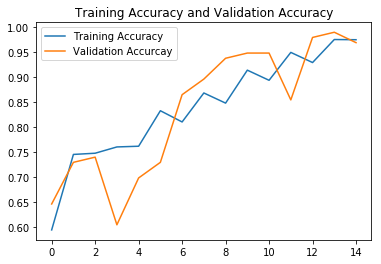

In [69]:
plt.plot(history.history['acc'],label='Training Accuracy')
plt.plot(history.history['val_acc'],label='Validation Accurcay')
plt.legend()
plt.title('Training Accuracy and Validation Accuracy')
plt.show()

## Visualize Training and Validation Loss

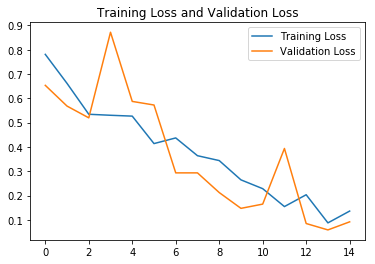

In [70]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Training Loss and Validation Loss')
plt.show()

##Prediction Probabilities

In [0]:
probabilities = model.predict_generator(validation_generator)

predictions = []
for i in probabilities:
  if i[0] > 0.5 :
    predictions.append(1)
  else:
    predictions.append(0)

In [72]:
len(predictions)

96

In [73]:
validation_generator.class_indices

{'no': 0, 'yes': 1}

In [0]:
preds = model.predict(X_test,batch_size=10)

In [76]:
len(preds),len(y_test)

(51, 51)

In [77]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8627450980392157


## Applying VGG16 CNN Model

In [78]:
vgg_model = VGG16(weights='imagenet',
                               include_top=False,
                               input_shape=(150,150,3))
vgg_model.summary()

W0721 13:40:32.763787 139724524828544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 13:40:32.766056 139724524828544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 13:40:32.772214 139724524828544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 13:40:32.816028 139724524828544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 1s 0us/step


W0721 13:40:33.894808 139724524828544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0721 13:40:33.896491 139724524828544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [79]:
from keras.optimizers import Adam, RMSprop
NUM_CLASSES = 1

model = Sequential()
model.add(vgg_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

W0721 13:40:41.191214 139724524828544 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0721 13:40:41.238309 139724524828544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8193      
Total params: 14,722,881
Trainable params: 8,193
Non-trainable params: 14,714,688
_________________________________________________________________


In [80]:
EPOCHS = 30
es = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=6
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=25,
    callbacks=[es]
)

Epoch 1/30
50/50 [==============================] - 9s 178ms/step - loss: 0.6777 - acc: 0.5960 - val_loss: 0.6263 - val_acc: 0.6033
Epoch 2/30
50/50 [==============================] - 5s 110ms/step - loss: 0.6143 - acc: 0.6694 - val_loss: 0.4982 - val_acc: 0.7815
Epoch 3/30
50/50 [==============================] - 6s 110ms/step - loss: 0.5555 - acc: 0.7029 - val_loss: 0.5262 - val_acc: 0.6901
Epoch 4/30
50/50 [==============================] - 6s 111ms/step - loss: 0.5012 - acc: 0.7501 - val_loss: 0.4301 - val_acc: 0.7941
Epoch 5/30
50/50 [==============================] - 5s 110ms/step - loss: 0.4836 - acc: 0.7623 - val_loss: 0.4510 - val_acc: 0.7314
Epoch 6/30
50/50 [==============================] - 6s 110ms/step - loss: 0.4221 - acc: 0.8171 - val_loss: 0.3891 - val_acc: 0.8193
Epoch 7/30
50/50 [==============================] - 5s 110ms/step - loss: 0.4300 - acc: 0.7994 - val_loss: 0.4043 - val_acc: 0.7934
Epoch 8/30
50/50 [==============================] - 6s 111ms/step - loss: 0.

##Model Performance¶

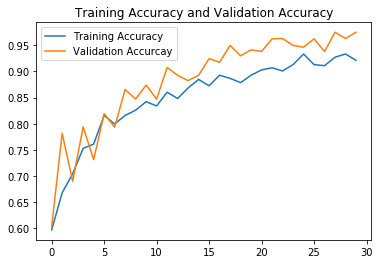

In [81]:
plt.plot(history.history['acc'],label='Training Accuracy')
plt.plot(history.history['val_acc'],label='Validation Accurcay')
plt.legend()
plt.title('Training Accuracy and Validation Accuracy')
plt.show()

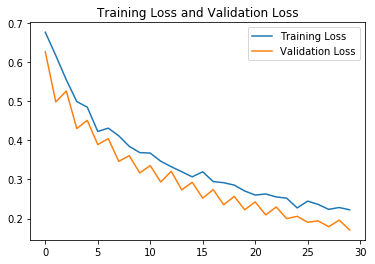

In [82]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Training Loss and Validation Loss')
plt.show()

##Predictions

In [84]:
# validate on val set
predictions = model.predict(X_test)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_test, predictions)
print('Val Accuracy = %.2f' % accuracy)

Val Accuracy = 0.94


## The VGG16 model produced an accuracy of 94 %

## Trying to upload an image(Brain Scan) randomly and let the model classify it

In [85]:
files.upload()

Saving Brain_scan.jpg to Brain_scan.jpg


{'Brain_scan.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x13\x12\x15\x13\x13\x12\x15\x16\x15\x17\x18\x18\x1a\x18\x18\x16\x19\x19\x1a\x19\x18\x17\x1a\x1e\x18\x1a\x1a \x1a\x1a\x18\x1e( \x1f\x1a%\x1d\x1b\x1a"2!(*+...\x18\x1f383-7(-.+\x01\n\n\n\x05\x05\x05\x0e\x05\x05\x0e+\x19\x13\x19++++++++++++++++++++++++++++++++++++++++++++++++++\xff\xc0\x00\x11\x08\x00\xe1\x00\xe1\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x03\x06\x07\x02\x01\xff\xc4\x00E\x10\x00\x01\x03\x03\x02\x03\x05\x06\x03\x03\x0b\x03\x04\x03\x00\x00\x01\x00\x02\x11\x03\x04!\x121\x05AQ\x06\x13"aq\x07#2B\x81\x91\x14R\xa1\xb1\xc1\xd1$34Sbrst\x92\xe1\xf0\x16C\xf1\x15\xa2\xc3\xd2\x17%\xb2\xff\xc4\x00\x14\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xc4\x00\x14\x11\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xda\x00\x0c\x0

In [95]:
IMG_PATH = 'Brain_scan.jpg'
image = cv2.imread(IMG_PATH)
#image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = Image.fromarray(image)
image = image.resize((150, 150))
X = np.array(image)
X.shape

(150, 150, 3)

## Since VGG16 model accepts a 4 dimensional input shape - training samples,height,width,scale of image

In [0]:
X = X.reshape((1,150, 150, 3))

In [97]:
X.shape

(1, 150, 150, 3)

In [88]:
X_test.shape

(51, 150, 150, 3)

##Prediction of the image uploaded

In [0]:
pred = model.predict(X)

## Predicting whether the image is tumurous or non tumurous

Brain_scan.jpgis non tumorous


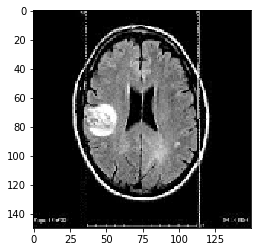

In [102]:
if pred > 0.5:
  print(IMG_PATH + 'is tumorous')
  plt.imshow(X[0])
else:
  print(IMG_PATH + 'is non tumorous')
  plt.imshow(X[0])